In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.DataFrame()
df= pd.read_csv('/Users/nickzelada/Desktop/Capstone/Smaller_Tweets_WithoutTime.csv')
df['created_at']=pd.to_datetime(df['created_at'])
#df['created_at'] = df['created_at'].dt.date
df=df.set_index('created_at')
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Date'] = df.index.day

In [3]:
df.head()

,full_text,Year,Month,Date
created_at,,,,
2020-04-09,RT @NorthmanTrader: I repeat: The Fed is reckl...,2020,4,9
2020-04-09,Treasury Secretary Mnuchin says US could be op...,2020,4,9
2020-04-09,Zacks: Brokerages Anticipate CVB Financial Cor...,2020,4,9
2020-04-09,#tradeitforward MTI's Ask An Analyst with Chri...,2020,4,9
2020-04-09,RT @Crypto____World: 🇿🇼ZIMBABWE🇿🇼\n\nCRYPTO NE...,2020,4,9


In [4]:
#Clean the text
#Create a function to clean the tweets

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',str(text)) # remove @ mention
    text = re.sub(r'#' ,'',str(text)) #removing the # symbol
    text = re.sub(r'RT[\s]+', '', str(text)) # Remove RT
    text = re.sub(r'https?:\/\/\S+', '', str(text)) #remove URL
    text = re.sub(r'\n', ' ', str(text)) #\n
    
    return text
#Cleaning the text
df['full_text'] = df['full_text'].apply(cleanTxt)

#Show the clean text

In [5]:
df.head()

,full_text,Year,Month,Date
created_at,,,,
2020-04-09,: I repeat: The Fed is recklessly distorting e...,2020,4,9
2020-04-09,Treasury Secretary Mnuchin says US could be op...,2020,4,9
2020-04-09,Zacks: Brokerages Anticipate CVB Financial Cor...,2020,4,9
2020-04-09,tradeitforward MTI's Ask An Analyst with Chris...,2020,4,9
2020-04-09,____World: 🇿🇼ZIMBABWE🇿🇼 CRYPTO NEWS🌍 Governm...,2020,4,9


In [6]:
# Removing emojis
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, ' ', text)

#Cleaning the text
df['full_text'] = df['full_text'].apply(remove_emojis)

In [7]:
df.head()

,full_text,Year,Month,Date
created_at,,,,
2020-04-09,: I repeat: The Fed is recklessly distorting e...,2020,4,9
2020-04-09,Treasury Secretary Mnuchin says US could be op...,2020,4,9
2020-04-09,Zacks: Brokerages Anticipate CVB Financial Cor...,2020,4,9
2020-04-09,tradeitforward MTI's Ask An Analyst with Chris...,2020,4,9
2020-04-09,____World: ZIMBABWE CRYPTO NEWS Governmen...,2020,4,9


In [8]:
# create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get a polarity, how postive or neg the text is
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns

df['Subjectivity']=df['full_text'].apply(getSubjectivity)
df['Polarity']=df['full_text'].apply(getPolarity)

In [9]:
# I want to see how many times S&P was said and COVID
df["SPXCount"]=df.full_text.str.count("spx|SPX|SP500|s&p500|sp500")
df["CovidCount"]=df.full_text.str.count("covid|COVID|COVID-19|covid-19|COVID19|pandemic|coronavirus|Coronavirus|quarantine")

In [10]:
df.tail()

,full_text,Year,Month,Date,Subjectivity,Polarity,SPXCount,CovidCount
created_at,,,,,,,,
2020-07-16,sorry Dinky its too much for your bank acc $S...,2020,7,16,0.600000,-0.150000,1,0
2020-07-16,Mondelez International $MDLZ Has A Neutral Fun...,2020,7,16,0.166667,0.000000,0,0
2020-07-16,Alumina Limited (ASX: $AWC) released second qu...,2020,7,16,0.071429,-0.035714,0,0
2020-07-16,$CMCSA Comcast's NBC Peacock streaming service...,2020,7,16,0.000000,0.000000,0,0
2020-07-16,Here's a dividends watchlist for the 01/04/07...,2020,7,16,0.469444,0.312500,0,0


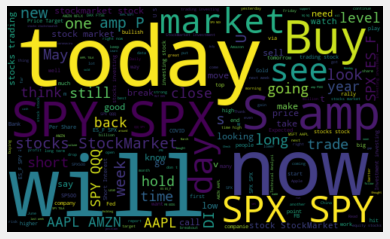

In [11]:
# Word Cloud
allWords = ' '.join([tweets for tweets in df['full_text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig('wordCloud.png', dpi=200)
plt.show()


In [12]:
# create function to compute the negative neutal and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)



In [13]:
df.tail()

,full_text,Year,Month,Date,Subjectivity,Polarity,SPXCount,CovidCount,Analysis
created_at,,,,,,,,,
2020-07-16,sorry Dinky its too much for your bank acc $S...,2020,7,16,0.600000,-0.150000,1,0,Negative
2020-07-16,Mondelez International $MDLZ Has A Neutral Fun...,2020,7,16,0.166667,0.000000,0,0,Neutral
2020-07-16,Alumina Limited (ASX: $AWC) released second qu...,2020,7,16,0.071429,-0.035714,0,0,Negative
2020-07-16,$CMCSA Comcast's NBC Peacock streaming service...,2020,7,16,0.000000,0.000000,0,0,Neutral
2020-07-16,Here's a dividends watchlist for the 01/04/07...,2020,7,16,0.469444,0.312500,0,0,Positive


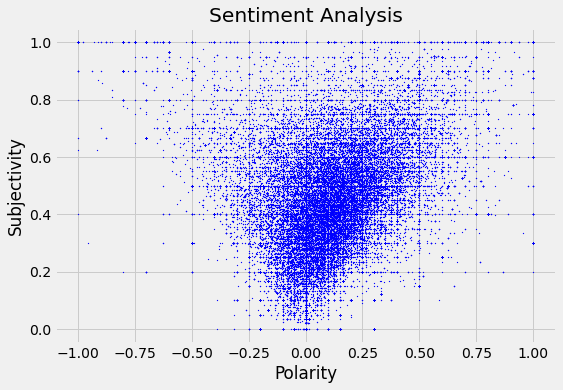

In [14]:
# plot the polarity and subjectivity, higher the subjectivity, it means the text contains more personal opinion
plt.figure(figsize=(8,6))

plt.scatter(df['Polarity'], df['Subjectivity'], color='Blue', s=0.6)
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('SubPolGraph.png', dpi=300)
plt.show()
    

In [15]:
# Percent of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['full_text']
round((ptweets.shape[0] / df.shape[0])*100, 1)

41.5

In [16]:
# Percent of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['full_text']
round((ntweets.shape[0] / df.shape[0])*100, 1)

15.9

In [17]:
# Percent of Neutral tweets
netweets = df[df.Analysis == 'Neutral']
netweets = netweets['full_text']
round((netweets.shape[0] / df.shape[0])*100, 1)

42.6

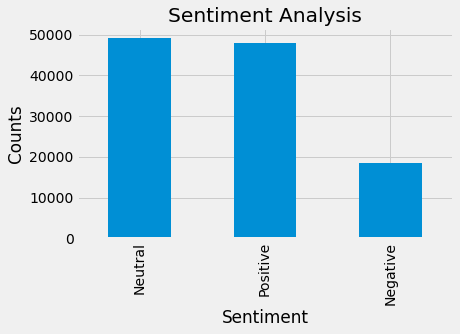

In [18]:
# show the value counts
df['Analysis'].value_counts()

#plot
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('Histo.png', dpi=300)
plt.show()

In [19]:
# Print all of positive tweets
df1=pd.DataFrame()
df1 = df[df['Polarity']  > 0] 

#df1=df1.set_index('created_at')

In [20]:
df1.head()

,full_text,Year,Month,Date,Subjectivity,Polarity,SPXCount,CovidCount,Analysis
created_at,,,,,,,,,
2020-04-09,tradeitforward MTI's Ask An Analyst with Chris...,2020,4,9,0.583333,0.500000,0,1,Positive
2020-04-09,"Traders, did you secure the this week? $SPY ...",2020,4,9,0.600000,0.400000,0,0,Positive
2020-04-09,: $AAPL CFO Luca Maestri DUMPS $10.8 MILLION W...,2020,4,9,0.100000,0.300000,0,0,Positive
2020-04-09,_hound: Torque Esports &amp; ESPN $DIS Tea...,2020,4,9,0.500000,0.136364,0,0,Positive
2020-04-09,: Thanks for the updates! ⏰ An even stronger ...,2020,4,9,0.200000,0.250000,0,0,Positive


In [21]:
# Print all of neg tweets
df2=pd.DataFrame()
df2 = df[df['Polarity']  < 0] 

In [22]:
df2.head()

,full_text,Year,Month,Date,Subjectivity,Polarity,SPXCount,CovidCount,Analysis
created_at,,,,,,,,,
2020-04-09,_joe TARP made money because the assets they ...,2020,4,9,0.850000,-0.400000,2,0,Negative
2020-04-09,: Load up on $AAPL. If they report a down quar...,2020,4,9,0.288889,-0.155556,0,0,Negative
2020-04-09,: $JPM has stopped making Small Business Loans...,2020,4,9,0.225000,-0.125000,0,0,Negative
2020-04-09,: Added back 5 ETF shorts late in the day. I'...,2020,4,9,0.533333,-0.100000,1,0,Negative
2020-04-09,$dis the 2012 masters? And wtf is nba 2k - and...,2020,4,9,0.700000,-0.450000,0,0,Negative


In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
       
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                          })
        
        return df

In [24]:
tc = TextCounts()
df_eda = tc.fit_transform(df.full_text)

In [25]:
df_eda['stock_sentiment'] = df.Analysis

In [26]:
def show_dist(df, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('stock_sentiment')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='stock_sentiment', height=5, hue='stock_sentiment', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()

Descriptive stats for count_words
---------------------------------
                   count       mean        std  min   25%   50%   75%   max
stock_sentiment                                                            
Negative         18407.0  24.070897  11.715075  2.0  16.0  22.0  29.0  71.0
Neutral          49161.0  17.368280   9.422191  0.0  11.0  16.0  22.0  75.0
Positive         47891.0  24.717797  11.494365  2.0  17.0  22.0  31.0  76.0


/Users/nickzelada/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


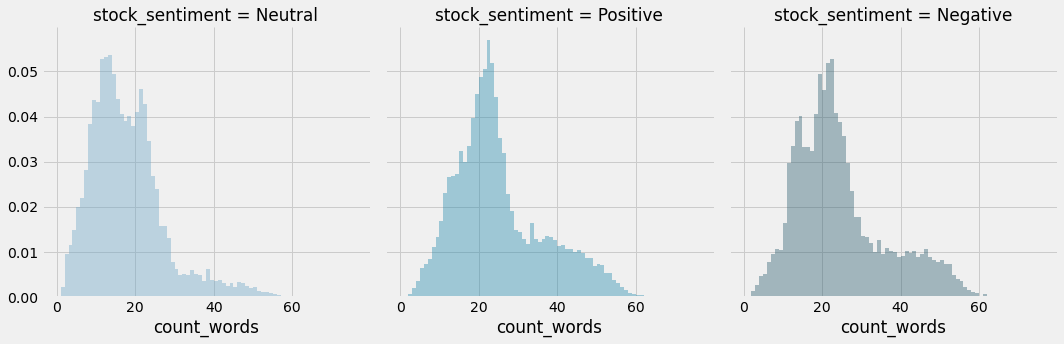

In [27]:
import seaborn as sns
show_dist(df_eda, 'count_words')

Descriptive stats for count_capital_words
-----------------------------------------
                   count      mean       std  min  25%  50%  75%   max
stock_sentiment                                                       
Negative         18407.0  2.726517  4.315427  0.0  1.0  1.0  3.0  49.0
Neutral          49161.0  3.111450  4.845557  0.0  1.0  2.0  3.0  49.0
Positive         47891.0  3.322837  5.282343  0.0  1.0  2.0  4.0  52.0


/Users/nickzelada/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


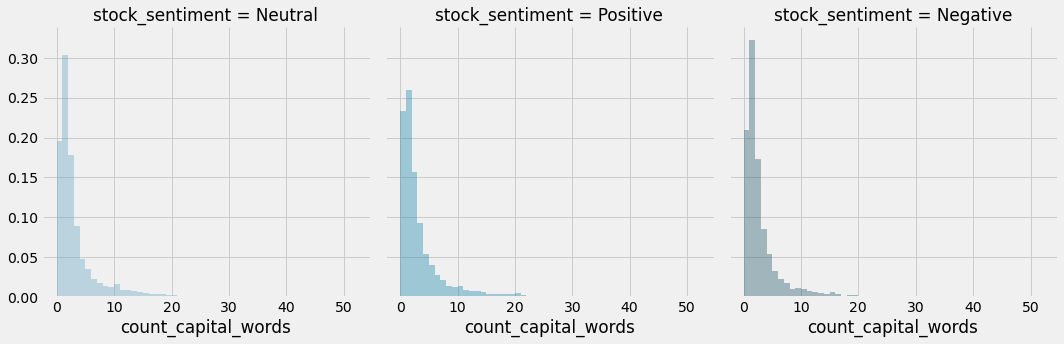

In [28]:
show_dist(df_eda, 'count_capital_words')

In [29]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
class CleanText(BaseEstimator, TransformerMixin):
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words)
    
    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_digits).apply(self.remove_stopwords).apply(self.stemming)
        return clean_X

In [30]:
ct = CleanText()
stock_clean = ct.fit_transform(df.full_text)
stock_clean.sample(5)

created_at
2020-04-17    MS doubl digit spread hungri inv: $.b “arb-abl...
2020-06-19    yep brought back bush-era $t+ deficit took hea...
2020-04-28    recommend model portfolio alreadi st april ult...
2020-06-16    invest like warren buffett. start free! portfo...
2020-06-06                       wear short nice touch.... $jpm
Name: full_text, dtype: object

In [31]:
empty_clean = stock_clean == ''
print('{} records have no words left after text cleaning'.format(stock_clean[empty_clean].count()))
stock_clean.loc[empty_clean] = '[no_text]'

4 records have no words left after text cleaning


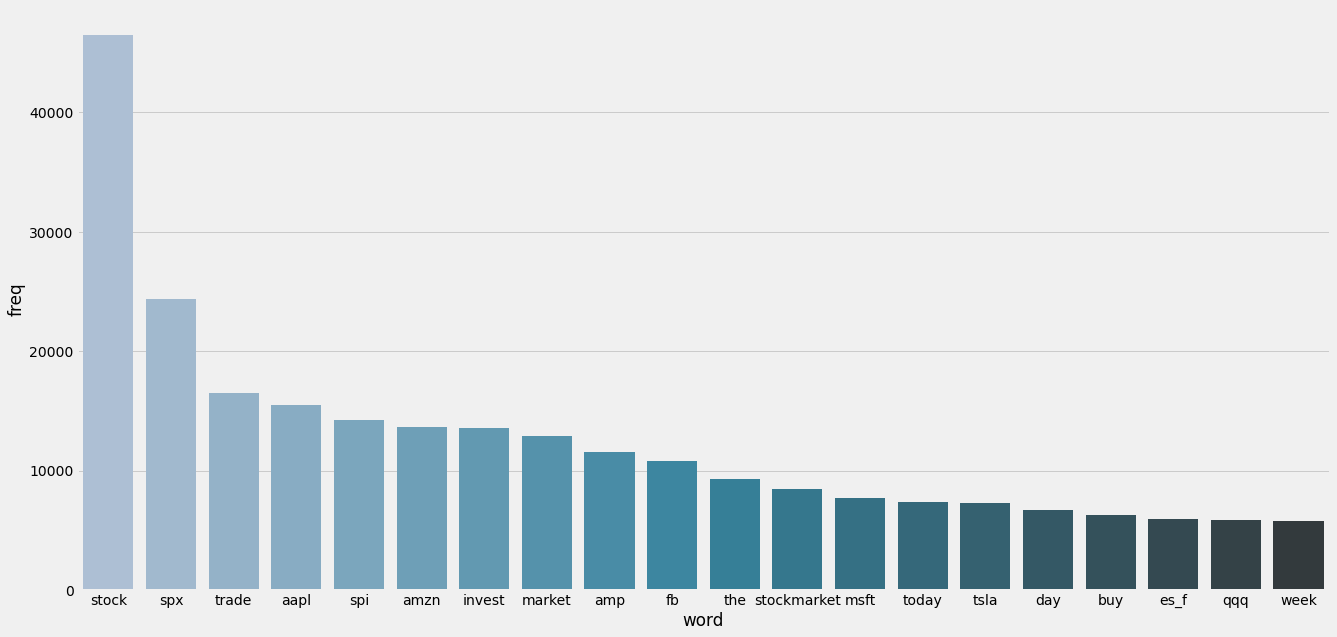

In [32]:
import collections
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bow = cv.fit_transform(stock_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(20, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [33]:
# SPX Historical Data of Prices
spx = pd.DataFrame()
spx = pd.read_csv('/Users/nickzelada/Desktop/Capstone/SPXHistoricalPrices.csv')
spx['Date']=pd.to_datetime(spx['Date'])
spx=spx.set_index('Date')
spx['Year'] = spx.index.year
spx['Month'] = spx.index.month
spx['Date'] = spx.index.day

In [34]:
spx.head()

,Open,High,Low,Close,Year,Month,Date
Date,,,,,,,
2020-07-31,3270.45,3272.17,3220.26,3271.12,2020,7,31
2020-07-30,3231.76,3250.92,3204.13,3246.22,2020,7,30
2020-07-29,3227.22,3264.74,3227.22,3258.44,2020,7,29
2020-07-28,3234.27,3243.72,3216.17,3218.44,2020,7,28
2020-07-27,3219.84,3241.43,3214.25,3239.41,2020,7,27


In [35]:
spx['Close']

Date
2020-07-31    3271.12
2020-07-30    3246.22
2020-07-29    3258.44
2020-07-28    3218.44
2020-07-27    3239.41
               ...   
2020-05-07    2881.19
2020-05-06    2848.42
2020-05-05    2868.44
2020-05-04    2842.74
2020-05-01    2830.71
Name: Close, Length: 64, dtype: float64

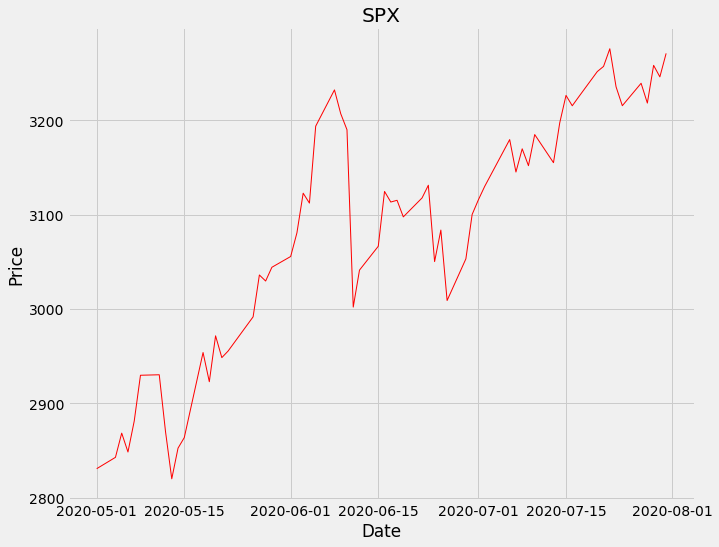

In [36]:
plt.figure(figsize=(10,9))
plt.plot(spx.Close, color='red', linewidth=1)
plt.title('SPX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('SPX.png', dpi=300)
plt.show()

In [37]:
peak=df.loc['06-01-2020':'15-06-2020', 'Analysis']



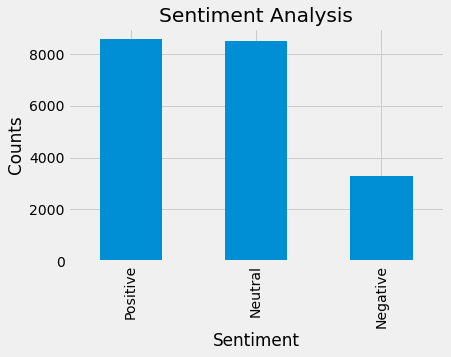

In [38]:
# show the value counts
peak.value_counts()

#plot
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
peak.value_counts().plot(kind='bar')
plt.show()

In [39]:
peak.value_counts()

Positive    8569
Neutral     8488
Negative    3284
Name: Analysis, dtype: int64

In [40]:
df.to_csv('df1.csv')

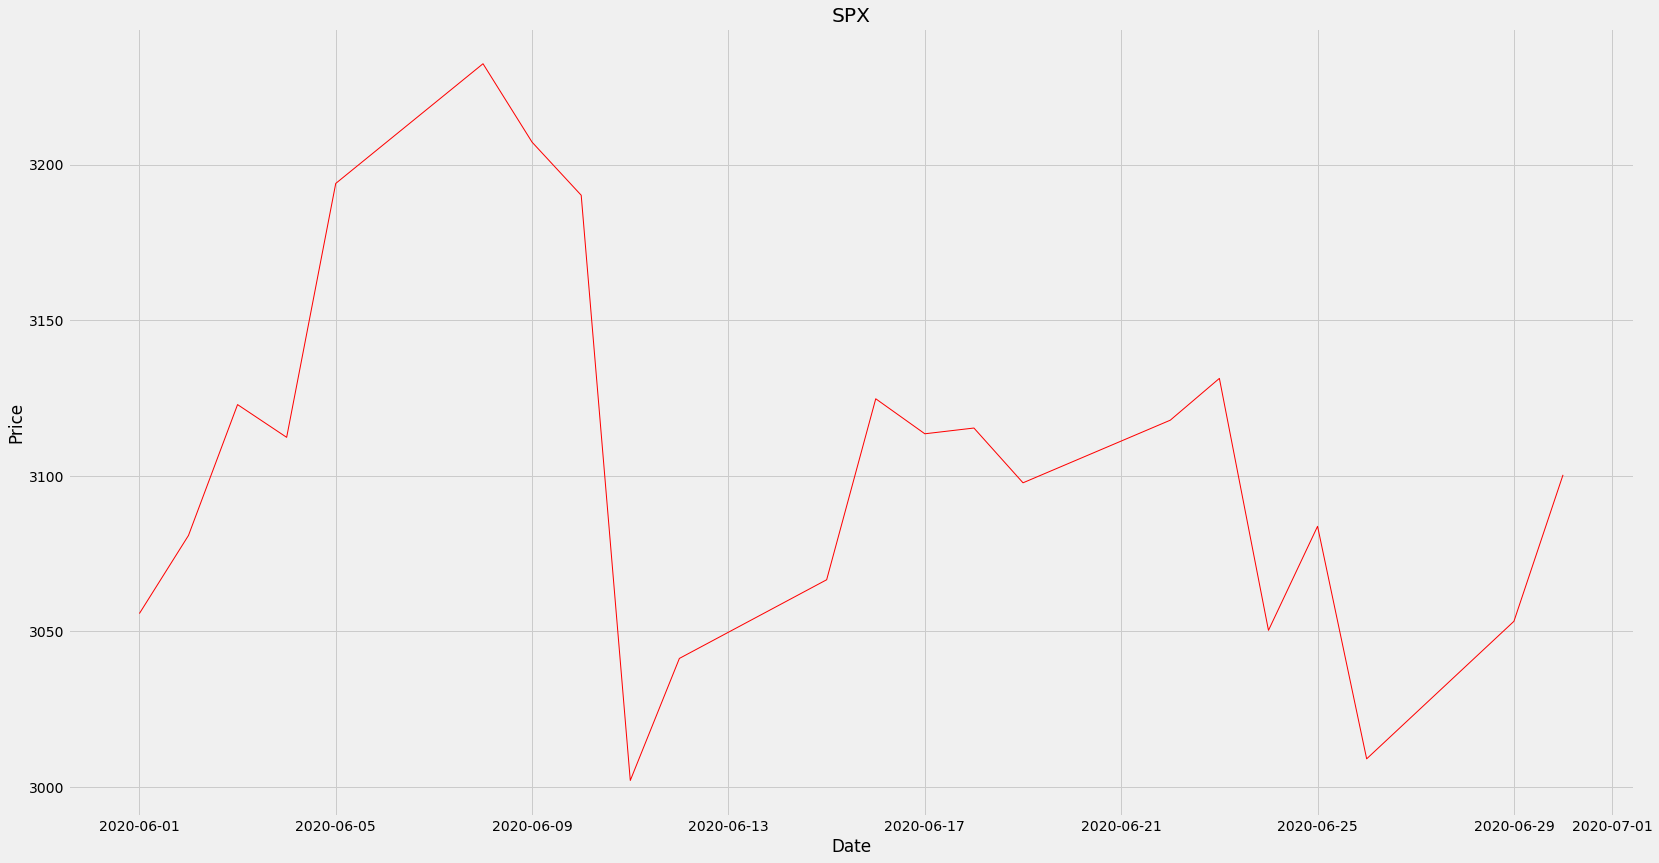

In [41]:
plt.figure(figsize=(25,15))
plt.plot(spx.loc['06-2020','Close'], color='red', linewidth=1)
plt.title('SPX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('SPXJune.png', dpi=300)
plt.show()

In [42]:
stock_clean= pd.DataFrame(stock_clean)

In [43]:
stock_clean.head()

,full_text
created_at,
2020-04-09,repeat: the fed recklessli distort everything....
2020-04-09,treasuri secretari mnuchin say US could open b...
2020-04-09,zacks: brokerag anticip cvb financi corp. $cvb...
2020-04-09,tradeitforward mti' ask An analyst chri pulver...
2020-04-09,____world: zimbabw crypto new govern team apol...


In [44]:
import swifter
def contains_word(word, dataframe, column):
    dataframe['contains_word_stock']=dataframe['full_text'].str.contains(word)
    dataframe['contains_word_stock']=dataframe['contains_word_stock'].replace(True, 1)
    dataframe['contains_word_stock']=dataframe['contains_word_stock'].replace(False, 0)
    return dataframe['contains_word_stock']
# example for the column text and word "here"
stock_clean.swifter.apply(lambda x: contains_word(word='stock', dataframe=stock_clean , column='full_text'), axis=0)

/Users/nickzelada/opt/anaconda3/lib/python3.8/site-packages/swifter/swifter.py:36: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

,full_text,contains_word_stock
created_at,,
2020-04-09,0.0,0.0
2020-04-09,0.0,0.0
2020-04-09,1.0,1.0
2020-04-09,1.0,1.0
2020-04-09,0.0,0.0
...,...,...
2020-07-16,0.0,0.0
2020-07-16,1.0,1.0
2020-07-16,1.0,1.0


In [45]:
def contains_word1(word, dataframe, column):
    dataframe['contains_word_spx']=dataframe['full_text'].str.contains(word)
    dataframe['contains_word_spx']=dataframe['contains_word_spx'].replace(True, 1)
    dataframe['contains_word_spx']=dataframe['contains_word_spx'].replace(False, 0)
    return dataframe['contains_word_spx']
# example for the column text and word "here"
stock_clean.swifter.apply(lambda x: contains_word1(word='spx', dataframe=stock_clean , column='full_text'), axis=0)

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

,full_text,contains_word_stock,contains_word_spx
created_at,,,
2020-04-09,1.0,1.0,1.0
2020-04-09,1.0,1.0,1.0
2020-04-09,0.0,0.0,0.0
2020-04-09,0.0,0.0,0.0
2020-04-09,0.0,0.0,0.0
...,...,...,...
2020-07-16,1.0,1.0,1.0
2020-07-16,0.0,0.0,0.0
2020-07-16,0.0,0.0,0.0


In [46]:
def contains_word2(word, dataframe, column):
    dataframe['contains_word_trade']=dataframe['full_text'].str.contains(word)
    dataframe['contains_word_trade']=dataframe['contains_word_trade'].replace(True, 1)
    dataframe['contains_word_trade']=dataframe['contains_word_trade'].replace(False, 0)
    return dataframe['contains_word_trade']
# example for the column text and word "here"
stock_clean.swifter.apply(lambda x: contains_word2(word='trade', dataframe=stock_clean , column='full_text'), axis=0)

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

,full_text,contains_word_stock,contains_word_spx,contains_word_trade
created_at,,,,
2020-04-09,0.0,0.0,0.0,0.0
2020-04-09,0.0,0.0,0.0,0.0
2020-04-09,0.0,0.0,0.0,0.0
2020-04-09,1.0,1.0,1.0,1.0
2020-04-09,0.0,0.0,0.0,0.0
...,...,...,...,...
2020-07-16,0.0,0.0,0.0,0.0
2020-07-16,0.0,0.0,0.0,0.0
2020-07-16,0.0,0.0,0.0,0.0


In [47]:
stock_clean.head()

,full_text,contains_word_stock,contains_word_spx,contains_word_trade
created_at,,,,
2020-04-09,repeat: the fed recklessli distort everything....,0.0,1.0,0.0
2020-04-09,treasuri secretari mnuchin say US could open b...,0.0,1.0,0.0
2020-04-09,zacks: brokerag anticip cvb financi corp. $cvb...,1.0,0.0,0.0
2020-04-09,tradeitforward mti' ask An analyst chri pulver...,1.0,0.0,1.0
2020-04-09,____world: zimbabw crypto new govern team apol...,0.0,0.0,0.0


In [48]:
stock_clean_daily_word_freq = pd.DataFrame()

In [49]:
stock_clean_daily_word_freq['contains_word_trade']=stock_clean['contains_word_trade'].resample('D').sum()

In [50]:
stock_clean_daily_word_freq['contains_word_spx']=stock_clean['contains_word_spx'].resample('D').sum()

In [51]:
stock_clean_daily_word_freq['contains_word_stock']=stock_clean['contains_word_stock'].resample('D').sum()

In [52]:
stock_clean_daily_word_freq=pd.DataFrame(stock_clean_daily_word_freq)

In [53]:
stock_clean_daily_word_freq.head()

,contains_word_trade,contains_word_spx,contains_word_stock
created_at,,,
2020-04-09,230.0,513.0,624.0
2020-04-10,115.0,187.0,333.0
2020-04-11,71.0,139.0,245.0
2020-04-12,102.0,158.0,284.0
2020-04-13,208.0,317.0,582.0


In [55]:
df_W_Time = pd.DataFrame()
df_W_Time= pd.read_csv('/Users/nickzelada/Desktop/Capstone/Smaller_Tweets.csv')
df_W_Time['created_at']=pd.to_datetime(df_W_Time['created_at'])
#df['created_at'] = df['created_at'].dt.date
df_W_Time=df_W_Time.set_index('created_at')
df_W_Time['Year'] = df_W_Time.index.year
df_W_Time['Month'] = df_W_Time.index.month
df_W_Time['Date'] = df_W_Time.index.day

In [56]:
df_W_Time.head()

,full_text,Year,Month,Date
created_at,,,,
2020-04-09 23:57:08+00:00,RT @NorthmanTrader: I repeat: The Fed is reckl...,2020,4,9
2020-04-09 23:55:42+00:00,Treasury Secretary Mnuchin says US could be op...,2020,4,9
2020-04-09 23:55:31+00:00,Zacks: Brokerages Anticipate CVB Financial Cor...,2020,4,9
2020-04-09 23:54:26+00:00,#tradeitforward MTI's Ask An Analyst with Chri...,2020,4,9
2020-04-09 23:53:13+00:00,RT @Crypto____World: 🇿🇼ZIMBABWE🇿🇼\n\nCRYPTO NE...,2020,4,9


In [57]:
#Clean the text
#Create a function to clean the tweets

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',str(text)) # remove @ mention
    text = re.sub(r'#' ,'',str(text)) #removing the # symbol
    text = re.sub(r'RT[\s]+', '', str(text)) # Remove RT
    text = re.sub(r'https?:\/\/\S+', '', str(text)) #remove URL
    text = re.sub(r'\n', ' ', str(text)) #\n
    
    return text
#Cleaning the text
df_W_Time['full_text'] = df_W_Time['full_text'].apply(cleanTxt)

#Show the clean text

In [58]:
# Removing emojis
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, ' ', text)

#Cleaning the text
df_W_Time['full_text'] = df_W_Time['full_text'].apply(remove_emojis)

In [59]:
# create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get a polarity, how postive or neg the text is
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns

df_W_Time['Subjectivity']=df_W_Time['full_text'].apply(getSubjectivity)
df_W_Time['Polarity']=df_W_Time['full_text'].apply(getPolarity)

In [60]:
df_W_Time["SPXCount"]=df_W_Time.full_text.str.count("spx|SPX|SP500|s&p500|sp500")
df_W_Time["CovidCount"]=df_W_Time.full_text.str.count("covid|COVID|COVID-19|covid-19|COVID19|pandemic|coronavirus|Coronavirus|quarantine")

In [61]:
# create function to compute the negative neutal and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df_W_Time['Analysis'] = df_W_Time['Polarity'].apply(getAnalysis)




In [62]:
df_W_Time.head()

,full_text,Year,Month,Date,Subjectivity,Polarity,SPXCount,CovidCount,Analysis
created_at,,,,,,,,,
2020-04-09 23:57:08+00:00,: I repeat: The Fed is recklessly distorting e...,2020,4,9,0.000000,0.0,1,0,Neutral
2020-04-09 23:55:42+00:00,Treasury Secretary Mnuchin says US could be op...,2020,4,9,0.500000,0.0,1,0,Neutral
2020-04-09 23:55:31+00:00,Zacks: Brokerages Anticipate CVB Financial Cor...,2020,4,9,0.000000,0.0,0,0,Neutral
2020-04-09 23:54:26+00:00,tradeitforward MTI's Ask An Analyst with Chris...,2020,4,9,0.583333,0.5,0,1,Positive
2020-04-09 23:53:13+00:00,____World: ZIMBABWE CRYPTO NEWS Governmen...,2020,4,9,0.000000,0.0,0,0,Neutral


In [63]:
#stock_clean_daily_word_freq.loc['06-2020','contains_word_stock']
#df = df[df['closing_price'].between(99, 101)]
June1=df_W_Time.loc['2020-06-01 15:00':'2020-06-01 16:00']
June2=df_W_Time.loc['2020-06-02 15:00':'2020-06-02 16:00']
June3=df_W_Time.loc['2020-06-03 15:00':'2020-06-03 16:00']
June4=df_W_Time.loc['2020-06-04 15:00':'2020-06-04 16:00']
June5=df_W_Time.loc['2020-06-05 15:00':'2020-06-05 16:00']
June6=df_W_Time.loc['2020-06-06 15:00':'2020-06-06 16:00']
June7=df_W_Time.loc['2020-06-07 15:00':'2020-06-07 16:00']
lastHRJuneEight=df_W_Time.loc['2020-06-08 15:00':'2020-06-08 16:00']
lastHRJuneNine=df_W_Time.loc['2020-06-09 15:00':'2020-06-09 16:00']
lastHRJuneTen=df_W_Time.loc['2020-06-10 15:00':'2020-06-10 16:00']
lastHRJuneEleven=df_W_Time.loc['2020-06-11 15:00':'2020-06-11 16:00']
June12=df_W_Time.loc['2020-06-12 15:00':'2020-06-12 16:00']
June13=df_W_Time.loc['2020-06-13 15:00':'2020-06-13 16:00']
June14=df_W_Time.loc['2020-06-14 15:00':'2020-06-14 16:00']
lastHRJuneFifteen=df_W_Time.loc['2020-06-15 15:00':'2020-06-15 16:00']
June16=df_W_Time.loc['2020-06-16 15:00':'2020-06-16 16:00']
June17=df_W_Time.loc['2020-06-17 15:00':'2020-06-17 16:00']
June18=df_W_Time.loc['2020-06-18 15:00':'2020-06-18 16:00']
June19=df_W_Time.loc['2020-06-19 15:00':'2020-06-19 16:00']
June20=df_W_Time.loc['2020-06-20 15:00':'2020-06-20 16:00']
June21=df_W_Time.loc['2020-06-21 15:00':'2020-06-21 16:00']
June22=df_W_Time.loc['2020-06-22 15:00':'2020-06-22 16:00']
June23=df_W_Time.loc['2020-06-23 15:00':'2020-06-23 16:00']
June24=df_W_Time.loc['2020-06-24 15:00':'2020-06-24 16:00']
June25=df_W_Time.loc['2020-06-25 15:00':'2020-06-25 16:00']
June26=df_W_Time.loc['2020-06-26 15:00':'2020-06-26 16:00']
June27=df_W_Time.loc['2020-06-27 15:00':'2020-06-27 16:00']
June28=df_W_Time.loc['2020-06-28 15:00':'2020-06-28 16:00']
June29=df_W_Time.loc['2020-06-29 15:00':'2020-06-29 16:00']
June30=df_W_Time.loc['2020-06-30 15:00':'2020-06-30 16:00']


In [64]:
June_Last_Hour=pd.concat([June1, June2, June3,June4,June5,June6,June7,lastHRJuneEight,lastHRJuneNine,lastHRJuneTen,lastHRJuneEleven,June12,June13,June14,lastHRJuneFifteen,June16,June17,June18,June19,June20,June21,June22, June23, June24,June25,June26,June27,June28,June29,June30])

In [65]:
June_Last_Hour

,full_text,Year,Month,Date,Subjectivity,Polarity,SPXCount,CovidCount,Analysis
created_at,,,,,,,,,
2020-06-01 16:00:51+00:00,Alphabet - $GOOG QUOTE $GOOG is UP on Mon...,2020,6,1,0.283333,-0.083333,0,0,Negative
2020-06-01 16:00:07+00:00,TBD Tech Top 3 $AAPL: -0.86% $AMZN: -0....,2020,6,1,0.500000,0.500000,0,0,Positive
2020-06-01 15:59:40+00:00,": $T HBO Max has bumpy start, 'isn't a game ch...",2020,6,1,0.400000,-0.400000,0,0,Negative
2020-06-01 15:59:14+00:00,3 Embarrasingly Cheap Dividend Stocks stocks ...,2020,6,1,0.700000,0.400000,0,0,Positive
2020-06-01 15:57:53+00:00,"_the_titans ""The stock market"" is largely a ...",2020,6,1,0.442857,0.154762,0,0,Positive
...,...,...,...,...,...,...,...,...,...
2020-06-30 15:02:18+00:00,": Re CentralBanks' market impact, this from : ...",2020,6,30,0.866667,0.716667,0,0,Positive
2020-06-30 15:01:50+00:00,$ZYNE DOWN 48% OVERREACTION gonna bounce $AAP...,2020,6,30,0.288889,-0.155556,0,0,Negative
2020-06-30 15:01:25+00:00,$MRK and $IDEX are green right now. MRK is up ...,2020,6,30,0.417857,0.042857,0,0,Positive


In [66]:
June_Last_Hour.to_csv('lastHRJune.csv')

In [67]:
df8 = pd.DataFrame()

In [68]:
df8= pd.read_csv('/Users/nickzelada/Desktop/Capstone/lastHRJune.csv')

In [69]:
df8['created_at']=df8['created_at'].str[:-9]

In [70]:
df8=df8.set_index('created_at') 

In [71]:
df8

,full_text,Year,Month,Date,Subjectivity,Polarity,SPXCount,CovidCount,Analysis
created_at,,,,,,,,,
2020-06-01 16:00,Alphabet - $GOOG QUOTE $GOOG is UP on Mon...,2020,6,1,0.283333,-0.083333,0,0,Negative
2020-06-01 16:00,TBD Tech Top 3 $AAPL: -0.86% $AMZN: -0....,2020,6,1,0.500000,0.500000,0,0,Positive
2020-06-01 15:59,": $T HBO Max has bumpy start, 'isn't a game ch...",2020,6,1,0.400000,-0.400000,0,0,Negative
2020-06-01 15:59,3 Embarrasingly Cheap Dividend Stocks stocks ...,2020,6,1,0.700000,0.400000,0,0,Positive
2020-06-01 15:57,"_the_titans ""The stock market"" is largely a ...",2020,6,1,0.442857,0.154762,0,0,Positive
...,...,...,...,...,...,...,...,...,...
2020-06-30 15:02,": Re CentralBanks' market impact, this from : ...",2020,6,30,0.866667,0.716667,0,0,Positive
2020-06-30 15:01,$ZYNE DOWN 48% OVERREACTION gonna bounce $AAP...,2020,6,30,0.288889,-0.155556,0,0,Negative
2020-06-30 15:01,$MRK and $IDEX are green right now. MRK is up ...,2020,6,30,0.417857,0.042857,0,0,Positive


In [72]:
#df8.to_csv('lastHRJune.csv')

In [73]:
#df15.head()

In [74]:
#June1["SPXCount"]=June1.full_text.str.count("spx")

In [75]:
df.full_text.str.count("covid|COVID|COVID-19|covid-19|COVID19|pandemic|coronavirus|Coronavirus|quarantine").sum()

6334